<a href="https://colab.research.google.com/github/ritiksharmasde/Deep_Learning/blob/main/ANN_cyclone_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('cyclone_dataset.csv')
print(df.head())

   Sea_Surface_Temperature  Atmospheric_Pressure   Humidity  Wind_Shear  \
0                27.498160           1008.521429  89.279758   13.979877   
1                28.404460           1001.242177  60.823380   19.548648   
2                27.216969            995.742693  77.277801    9.368437   
3                27.824280           1003.555279  67.986951   12.713517   
4                26.260206           1008.466566  98.625281   17.125960   

   Vorticity  Latitude  Ocean_Depth  Proximity_to_Coastline  \
0   0.000020  8.119890    76.137625                1.366176   
1   0.000084  9.246782   131.821235                0.683405   
2   0.000063  7.789877   181.465092                0.866362   
3   0.000061  5.929008   323.395183                0.670524   
4   0.000034  6.953442   357.904862                0.940152   

   Pre_existing_Disturbance  Cyclone  
0                         1        1  
1                         1        1  
2                         1        1  
3             

In [3]:


# Function to calculate Entropy
def entropy(s):
    proportions = s.value_counts(normalize=True)
    return -np.sum(proportions * np.log2(proportions))

# Calculate Entropy for the entire dataset based on the target variable "Cyclone"
entropy_total = entropy(df["Cyclone"])

# Calculate Information Gain for each feature
information_gains = {}

for feature in df.columns:
    if feature != "Cyclone":
        # Calculate the weighted entropy for this feature
        weighted_entropy = 0
        for value in df[feature].unique():
            subset = df[df[feature] == value]
            weighted_entropy += (len(subset) / len(df)) * entropy(subset["Cyclone"])
        # Information Gain = Entropy(Parent) - Weighted Entropy
        information_gain = entropy_total - weighted_entropy
        information_gains[feature] = information_gain

# Get top 3 features with highest information gain
top_3_features = sorted(information_gains.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_features


[('Sea_Surface_Temperature', 1.0),
 ('Atmospheric_Pressure', 1.0),
 ('Humidity', 1.0)]

['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity', 'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth', 'Proximity_to_Coastline', 'Pre_existing_Disturbance', 'Cyclone']
['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity', 'Cyclone']
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5506 - loss: 4.0434 - val_accuracy: 0.6550 - val_loss: 0.6450
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7219 - loss: 0.5591 - val_accuracy: 0.7275 - val_loss: 0.6851
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 0.5062 - val_accuracy: 0.7075 - val_loss: 0.6289
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5602 - val_accuracy: 0.7200 - val_loss: 0.4590
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.5033 - val_accuracy: 0.7100 - val_loss: 0.8605
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7385 - loss: 0.7162 - val_accuracy: 0.6600 - val_loss: 1.0585
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7750 - loss: 0.4959 - val_accuracy: 0.7675 - val_loss: 0.4544
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.4802 - val_accuracy: 0.7500 - val_loss: 0.4282
Epo

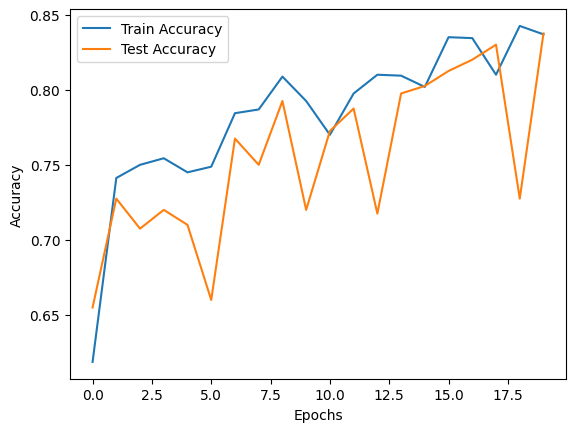

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Probability: 0.9500956
Predicted Class (0 = No Cyclone, 1 = Cyclone): 1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Sample Predictions: [0 1 0 0 0 0 1 0 1 0]
Actual Labels: [0 1 0 1 0 0 1 0 1 0]


In [15]:

print(df.columns.tolist())
df = df.drop(columns=[ 'Wind_Shear', 'Vorticity', 'Latitude', 'Ocean_Depth', 'Proximity_to_Coastline', 'Pre_existing_Disturbance'])
print(df.columns.tolist())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('cyclone_dataset.csv')

# Select only the relevant features and the target
X_raw = df[['Sea_Surface_Temperature', 'Atmospheric_Pressure', 'Humidity']]  # Features
y = df["Cyclone"]  # Target variable

# Reshape data for CNN (adding an extra dimension for channels)
X_reshaped = X_raw.values.reshape((X_raw.shape[0], X_raw.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()

# Add convolutional layer (1D) without pooling (due to small feature size)
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add dense layers for classification
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# --- PREDICTION SECTION ---

# Define a real-world custom input for prediction (Example: 30°C SST, 1005 hPa Pressure, 80% Humidity)
custom_input = np.array([[30.0, 1005, 80]])  # Adjust values as needed

# Reshape for CNN input
custom_input_reshaped = custom_input.reshape((1, 3, 1))

# Predict using the trained model
prediction = model.predict(custom_input_reshaped)

# Convert probability to binary class (0 = No Cyclone, 1 = Cyclone)
predicted_class = (prediction > 0.5).astype(int)

# Print the prediction result
print("Predicted Probability:", prediction[0][0])
print("Predicted Class (0 = No Cyclone, 1 = Cyclone):", predicted_class[0][0])

# Predict on the test set
pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
pred_binary = (pred > 0.5).astype(int)

# Print sample test predictions
print("Sample Predictions:", pred_binary[:10].flatten())
print("Actual Labels:", y_test[:10].values.flatten())


In [9]:
model.save("cyclone_ann_model.h5")